<a href="https://colab.research.google.com/github/18K41A0288/NNDL/blob/main/Assignment%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import math
import random as r
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

d = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx")

from scipy import stats

z = np.abs(stats.zscore(d.iloc[:,0]))

threshold = 3
print(np.where(z > 3),"\n\n")

d.describe()

(array([928]),) 




,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


[4983.17184, 4888.3967999999995, 5072.95872, 5196.259800000001, 5641.2972, 7153.177320000001, 7849.80504, 6329.97504, 6292.8756, 5349.801600000001, 5225.409360000001, 5000.474520000001, 4775.53968, 6177.05676, 6177.05676, 6155.7011999999995, 6212.12976, 7424.2526400000015, 7407.4176, 7068.222720000001, 6515.784000000001, 6350.08356, 5502.252240000001, 4931.263800000001, 4775.53968, 4713.811199999999, 4689.02628, 4844.750400000001, 5571.46296, 6150.713040000001, 6296.30496, 6515.1604800000005, 6269.649480000001, 5607.0036, 5932.7928, 5675.5908, 5675.27904, 5435.535599999999, 5572.71, 6023.2032, 6110.496, 7951.7505599999995, 8013.011399999999, 7591.82364, 7088.17536, 6477.12576, 5848.6176000000005, 5460.4764000000005, 5097.899519999999, 5062.9824, 5080.440959999999, 5324.8607999999995, 5970.82752, 6477.12576, 6635.8116, 6635.8116, 6371.595000000001, 6303.63132, 6447.1968, 6104.2608, 5778.4716, 5865.608520000001, 5847.0588, 6104.2608, 6704.3988, 7510.2984, 7995.0852, 7641.237600000001, 59

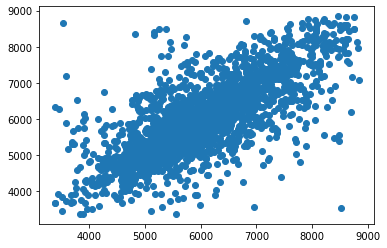

In [93]:
d.iloc[928,0] = d.iloc[927,0]
x = []
y = []
for i in range(len(d.iloc[:,0])-24):
  x.append(d.iloc[i,0])
  y.append(d.iloc[i+24,0])
print(x)
print(y,"\n\n\n")
plt.scatter(x,y)

In [79]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)

In [98]:
l=0.01
vm=0
vc=0
mc=0.9
m=1
c=1
m_iter=6
bs=500

In [99]:
x = minmax_scale(x)
y = minmax_scale(y)

data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

error_list = []
number_of_batches = (len(data_train)//bs)
for i in range(m_iter):
  for j in range(nb+1):
    if j == nb:
      d = data_train[j*bs:]
    else:
      d = data_train[j*bs:(j+1)*bs]

    deltam = -1*l*gradm(d,m,c,vm,vc,mc)
    deltac = -1*l*gradc(d,m,c,vm,vc,mc)

    vm = vm*mc + deltam
    vc = vc*mc + deltac

    m = m + vm
    c = c + vc

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  r.shuffle(data_train)
  
print("\n\noptimal mean value occurs at m = ",m,"c = ",c)

2159
epoch 0, batch 0, error 0.49384410535316886
epoch 0, batch 1, error 0.472340311447503
epoch 0, batch 2, error 0.4475875069339256
epoch 0, batch 3, error 0.4109791152070327
epoch 1, batch 0, error 0.36874583940324634
epoch 1, batch 1, error 0.31723432379449806
epoch 1, batch 2, error 0.28007388617566964
epoch 1, batch 3, error 0.23884539527992424
epoch 2, batch 0, error 0.19640402745325294
epoch 2, batch 1, error 0.16098201416675678
epoch 2, batch 2, error 0.1294603232729242
epoch 2, batch 3, error 0.10248191808590476
epoch 3, batch 0, error 0.07632307654560376
epoch 3, batch 1, error 0.0576703018405609
epoch 3, batch 2, error 0.042314074991565205
epoch 3, batch 3, error 0.029615322030425474
epoch 4, batch 0, error 0.02067961165161824
epoch 4, batch 1, error 0.014067600174163001
epoch 4, batch 2, error 0.009285389471482875
epoch 4, batch 3, error 0.010577381654423497
epoch 5, batch 0, error 0.008429007035744503
epoch 5, batch 1, error 0.009052612129293078
epoch 5, batch 2, error 0.

Text(0.5, 1.0, 'error graph')

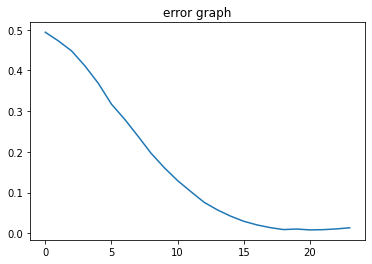

In [100]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [101]:
print("train error :",error(data_train,m,c),"test error :",error(data_test,m,c))
print("\nm = ",m,"c = ",c)

train error : 0.012396911900744658 test error : 0.012457721596927176

m =  0.5696730439631598 c =  0.12731959072100782


In [102]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4500
predicted load for this hour is :  4712.780955562956
